<a href="https://colab.research.google.com/github/jaivanti/syracuse/blob/main/espcn_vid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-contrib-python==4.3.0.36

     |████████████████████████████████| 49.9 MB 54 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import cv2

In [ ]:
from cv2 import dnn_superres

In [ ]:
# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

In [ ]:
!pip install pafy

In [ ]:
!pip install imutils pafy youtube-dl

     |████████████████████████████████| 1.9 MB 13.2 MB/s 


In [ ]:
import numpy as np


In [ ]:
!mkdir -p /content/PATH/
%cd PATH

/content/PATH


In [ ]:
import imutils
import cv2
import pafy
url = 'https://www.youtube.com/watch?v=c0ruHxX7r3M'
video = pafy.new(url)
videoStream = video.getbestvideo()
vidcap  = cv2.VideoCapture(videoStream.url)

In [ ]:
def getFrame(time,frameCount):
   vidcap.set(cv2.CAP_PROP_POS_MSEC,time)
   frameDet, frame = vidcap.read()
   if frameDet:
      frame = imutils.resize(frame,width=128)
      cv2.imwrite(str(frameCount)+".jpg", frame)

In [ ]:
startTime = 0
frameRate = 500
frameCount = 1
h,m,s = video.duration.split(sep=':')
endTime = (int(h)*3600 + int(m)*60 +int(s))*1000
for time in range(startTime,endTime,frameRate):
   frameCount = frameCount + 1
   time = round(time,2)
   getFrame(time,frameCount)

In [ ]:
#path = "/content/drive/MyDrive/SR CDN/ESPCN_x3.pb" (suyash path)
path = "/content/drive/MyDrive/ESPCN_x3.pb" #(jaivanti path)
sr.readModel(path)

In [ ]:
sr.setModel("espcn",3)

In [ ]:
import tensorflow as tf
import os,sys

In [ ]:
import PIL
import os
from PIL import Image

In [ ]:
directory = '/content/PATH/'
for filename in os.scandir(directory):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        print(filename.path)
        image = cv2.imread(filename.path)
        result = sr.upsample(image)
        cv2.imwrite("./upscaled.png", result)
        

/content/PATH/2.jpg
/content/PATH/4.jpg
/content/PATH/5.jpg
/content/PATH/3.jpg


In [ ]:
import time
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] inference time {:.6f} seconds".format(
	end - start))

[INFO] inference time 0.017412 seconds


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

In [ ]:
directory = '/content/PATH/'
for filename in os.scandir(directory):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        print(filename.path)
        image = cv2.imread(filename.path)
        resized = cv2.resize(image,None,fx=3,fy=3)
        cv2.imwrite("./resized.png", result)

/content/PATH/2.jpg
/content/PATH/4.jpg
/content/PATH/5.jpg
/content/PATH/3.jpg
/content/PATH/upscaled.png


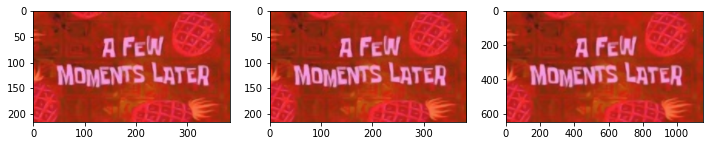

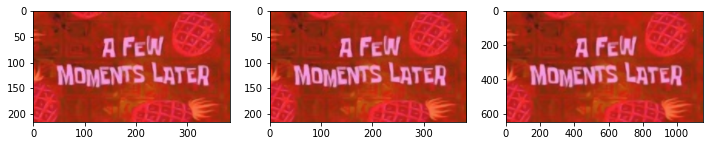

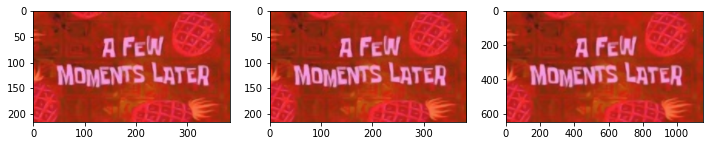

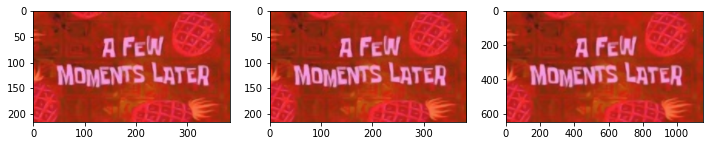

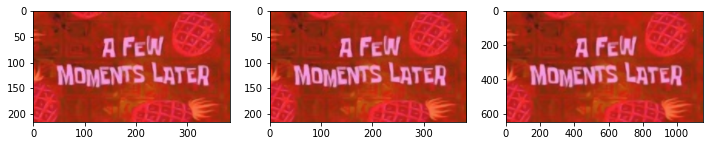

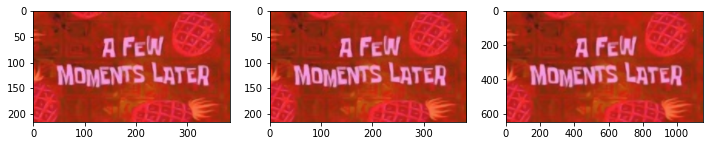

In [ ]:
directory = '/content/PATH/'
for filename in os.scandir(directory):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        plt.figure(figsize=(12,8))
        plt.subplot(1,3,1)
	# Original image
        plt.imshow(image[:,:,::-1])
        plt.subplot(1,3,2)
	# SR upscaled
        plt.imshow(result[:,:,::-1])
        plt.subplot(1,3,3)
	# OpenCV upscaled
        plt.imshow(resized[:,:,::-1])
        plt.show()

In [ ]:
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim

In [ ]:
for filename in os.scandir(directory):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        print(filename.path)
        image = cv2.imread(filename.path)
        dimensions = image.shape
        print('shape',dimensions)
        #print('PSNR: %f', tf.image.psnr())
        #print("PSNR of super resolved image: %f", tf.image.psnr(result, image, max_val=255))  
        #print("SSIM of super resolved image: %f", tf.image.ssim(image, result, resized).numpy())

/content/PATH/resized.png
shape (216, 384, 3)
/content/PATH/2.jpg
shape (72, 128, 3)
/content/PATH/4.jpg
shape (72, 128, 3)
/content/PATH/5.jpg
shape (72, 128, 3)
/content/PATH/3.jpg
shape (72, 128, 3)
/content/PATH/upscaled.png
shape (216, 384, 3)
